#Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import accuracy_score,f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#Problem 1

##Part 1


In [ ]:
columns=['family',
    'product-type',
    'steel',
    'carbon',
    'hardness',
    'temper_rolling',
    'condition',
    'formability',
    'strength',
   'non-ageing',
   'surface-finish',
   'surface-quality',
   'enamelability',
   'bc',
   'bf',
   'bt',
   'bw/me',
   'bl',
   'm',
   'chrom',
   'phos',
   'cbond',
   'marvi',
   'exptl',
   'ferro',
   'corr',
   'blue/bright/varn/clean',
   'lustre',
   'jurofm',
   's',
   'p',
   'shape',
   'thick',
   'width',
   'len',
   'oil',
   'bore',
   'packing',
   'classes']
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data',names=columns)
test_df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.test',names=columns)
df

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [ ]:
df.describe()

,carbon,hardness,strength,thick,width,len,bore
count,798.000000,798.000000,798.00000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,30.85213,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,115.55127,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.00000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,0.00000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,700.00000,4.000000,1525.000000,4880.000000,600.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  798 non-null    object 
 1   product-type            798 non-null    object 
 2   steel                   798 non-null    object 
 3   carbon                  798 non-null    int64  
 4   hardness                798 non-null    int64  
 5   temper_rolling          798 non-null    object 
 6   condition               798 non-null    object 
 7   formability             798 non-null    object 
 8   strength                798 non-null    int64  
 9   non-ageing              798 non-null    object 
 10  surface-finish          798 non-null    object 
 11  surface-quality         798 non-null    object 
 12  enamelability           798 non-null    object 
 13  bc                      798 non-null    object 
 14  bf                      798 non-null    ob

In [ ]:
df.replace(to_replace='?',value=None,inplace=True)
test_df.replace(to_replace='?',value=None,inplace=True)

df

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,None,C,A,8,0,None,S,None,0,None,...,None,None,COIL,0.700,610.0,0,None,0,None,3
1,None,C,R,0,0,None,S,2,0,None,...,None,None,COIL,3.200,610.0,0,None,0,None,3
2,None,C,R,0,0,None,S,2,0,None,...,None,None,SHEET,0.700,1300.0,762,None,0,None,3
3,None,C,A,0,60,T,None,None,0,None,...,None,None,COIL,2.801,385.1,0,None,0,None,3
4,None,C,A,0,60,T,None,None,0,None,...,None,None,SHEET,0.801,255.0,269,None,0,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,None,C,A,0,50,T,None,None,0,None,...,None,None,COIL,1.001,50.0,0,Y,0,None,3
794,None,C,None,0,0,None,S,1,0,None,...,None,None,SHEET,0.699,1300.0,4880,None,0,None,3
795,None,C,A,0,0,None,S,2,0,None,...,None,None,COIL,0.400,609.9,0,None,0,None,3
796,None,C,A,0,0,None,S,2,0,None,...,None,None,SHEET,3.200,610.0,4880,None,0,None,3


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  111 non-null    object 
 1   product-type            798 non-null    object 
 2   steel                   728 non-null    object 
 3   carbon                  798 non-null    int64  
 4   hardness                798 non-null    int64  
 5   temper_rolling          123 non-null    object 
 6   condition               527 non-null    object 
 7   formability             515 non-null    object 
 8   strength                798 non-null    int64  
 9   non-ageing              95 non-null     object 
 10  surface-finish          8 non-null      object 
 11  surface-quality         581 non-null    object 
 12  enamelability           13 non-null     object 
 13  bc                      1 non-null      object 
 14  bf                      118 non-null    ob

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  15 non-null     object 
 1   product-type            100 non-null    object 
 2   steel                   84 non-null     object 
 3   carbon                  100 non-null    int64  
 4   hardness                100 non-null    int64  
 5   temper_rolling          14 non-null     object 
 6   condition               68 non-null     object 
 7   formability             65 non-null     object 
 8   strength                100 non-null    int64  
 9   non-ageing              10 non-null     object 
 10  surface-finish          1 non-null      object 
 11  surface-quality         73 non-null     object 
 12  enamelability           3 non-null      object 
 13  bc                      0 non-null      object 
 14  bf                      11 non-null     obj

##Part 2

In [ ]:
for header in df.columns:
    if(df[header].isnull().sum()>0.25*len(df[header])):
        df.drop(header,axis=1,inplace=True)
        test_df.drop(header,axis=1,inplace=True)
        

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  798 non-null    object 
 1   steel         728 non-null    object 
 2   carbon        798 non-null    int64  
 3   hardness      798 non-null    int64  
 4   strength      798 non-null    int64  
 5   shape         798 non-null    object 
 6   thick         798 non-null    float64
 7   width         798 non-null    float64
 8   len           798 non-null    int64  
 9   bore          798 non-null    int64  
 10  classes       798 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  100 non-null    object 
 1   steel         84 non-null     object 
 2   carbon        100 non-null    int64  
 3   hardness      100 non-null    int64  
 4   strength      100 non-null    int64  
 5   shape         100 non-null    object 
 6   thick         100 non-null    float64
 7   width         100 non-null    float64
 8   len           100 non-null    int64  
 9   bore          100 non-null    int64  
 10  classes       100 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.7+ KB


In [ ]:
df.dropna(inplace=True)
test_df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 797
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  728 non-null    object 
 1   steel         728 non-null    object 
 2   carbon        728 non-null    int64  
 3   hardness      728 non-null    int64  
 4   strength      728 non-null    int64  
 5   shape         728 non-null    object 
 6   thick         728 non-null    float64
 7   width         728 non-null    float64
 8   len           728 non-null    int64  
 9   bore          728 non-null    int64  
 10  classes       728 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  84 non-null     object 
 1   steel         84 non-null     object 
 2   carbon        84 non-null     int64  
 3   hardness      84 non-null     int64  
 4   strength      84 non-null     int64  
 5   shape         84 non-null     object 
 6   thick         84 non-null     float64
 7   width         84 non-null     float64
 8   len           84 non-null     int64  
 9   bore          84 non-null     int64  
 10  classes       84 non-null     object 
dtypes: float64(2), int64(5), object(4)
memory usage: 7.9+ KB


In [ ]:
product_type_values=['C', 'H', 'G']
df['product-type'].replace(to_replace=product_type_values,value=np.arange(len(product_type_values)),inplace=True)
test_df['product-type'].replace(to_replace=product_type_values,value=np.arange(len(product_type_values)),inplace=True)

steel_values=['-','R','A','U','K','M','S','W','V']
df['steel'].replace(to_replace=steel_values,value=np.arange(len(steel_values)),inplace=True)
test_df['steel'].replace(to_replace=steel_values,value=np.arange(len(steel_values)),inplace=True)

shape_values=['COIL', 'SHEET']
df['shape'].replace(to_replace=shape_values,value=np.arange(len(shape_values)),inplace=True)
test_df['shape'].replace(to_replace=shape_values,value=np.arange(len(shape_values)),inplace=True)

df['classes'].replace(to_replace='U',value=6,inplace=True)
test_df['classes'].replace(to_replace='U',value=6,inplace=True)

df


,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,0,2,8,0,0,0,0.700,610.0,0,0,3
1,0,1,0,0,0,0,3.200,610.0,0,0,3
2,0,1,0,0,0,1,0.700,1300.0,762,0,3
3,0,2,0,60,0,0,2.801,385.1,0,0,3
4,0,2,0,60,0,1,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,0,1,0,0,0,0,0.900,966.0,0,0,3
793,0,2,0,50,0,0,1.001,50.0,0,0,3
795,0,2,0,0,0,0,0.400,609.9,0,0,3
796,0,2,0,0,0,1,3.200,610.0,4880,0,3


In [ ]:
test_df

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,0,2,0,45,0,0,1.600,610.0,0,0,3
1,0,2,0,0,0,0,0.699,609.9,0,0,3
2,0,2,0,85,0,1,0.400,610.0,762,0,6
3,0,2,0,50,0,0,0.400,610.0,0,0,3
4,0,2,0,0,0,0,0.699,1320.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,0,1,1.599,610.0,762,0,2
96,0,1,0,0,0,1,1.601,830.0,880,0,2
97,0,8,0,0,0,1,1.599,150.0,762,0,2
98,0,2,0,85,0,0,0.400,20.0,0,0,6


In [ ]:
X=df.drop(['classes','product-type'],axis=1)
y=df['classes'].to_numpy()

X_test=test_df.drop('classes',axis=1)
y_test=test_df['classes'].to_numpy()

In [ ]:
std_sc=StandardScaler()
std_sc.fit(X)
std_X=std_sc.transform(X)
std_sc.fit(X_test)
std_X_test=std_sc.transform(X_test)
pd.DataFrame(std_X)

,0,1,2,3,4,5,6,7,8
0,-0.099727,0.290026,-0.478595,-0.260364,-1.083113,-0.584540,-0.437242,-0.677387,-0.234004
1,-0.778247,-0.274328,-0.478595,-0.260364,-1.083113,2.309846,-0.437242,-0.677387,-0.234004
2,-0.778247,-0.274328,-0.478595,-0.260364,0.923264,-0.584540,1.273060,-0.275936,-0.234004
3,-0.099727,-0.274328,1.936774,-0.260364,-1.083113,1.847902,-0.994701,-0.677387,-0.234004
4,-0.099727,-0.274328,1.936774,-0.260364,0.923264,-0.467607,-1.317179,-0.535667,-0.234004
...,...,...,...,...,...,...,...,...,...
723,-0.778247,-0.274328,-0.478595,-0.260364,-1.083113,-0.352989,0.445175,-0.677387,-0.234004
724,-0.099727,-0.274328,1.534213,-0.260364,-1.083113,-0.236056,-1.825312,-0.677387,-0.234004
725,-0.099727,-0.274328,-0.478595,-0.260364,-1.083113,-0.931867,-0.437489,-0.677387,-0.234004
726,-0.099727,-0.274328,-0.478595,-0.260364,0.923264,2.309846,-0.437242,1.893582,-0.234004


In [ ]:
X=X.to_numpy().astype(float)
X_test=X_test.to_numpy().astype(float)

In [ ]:
X_train,X_valid,y_train,y_valid=tts(X,y,test_size=0.35)
std_X_train,std_X_valid,std_y_train,std_y_valid=tts(X,y,test_size=0.35)

print(X_train.shape,X_valid.shape,std_X_train.shape,std_X_valid.shape)

(473, 9) (255, 9) (473, 9) (255, 9)


In [ ]:
X

array([[2.000e+00, 8.000e+00, 0.000e+00, ..., 6.100e+02, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 6.100e+02, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.300e+03, 7.620e+02,
        0.000e+00],
       ...,
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 6.099e+02, 0.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 6.100e+02, 4.880e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+03, 4.170e+03,
        0.000e+00]])

##Part 3

In [ ]:
y=np.array(y,dtype=float)
X_train=np.array(X_train,dtype=float)
X_valid=np.array(X_valid,dtype=float)
y_train=np.array(y_train,dtype=float)
y_valid=np.array(y_valid,dtype=float)
std_X_train=np.array(std_X_train,dtype=float)
std_X_valid=np.array(std_X_valid,dtype=float)
std_y_train=np.array(std_y_train,dtype=float)
std_y_valid=np.array(std_y_valid,dtype=float)
std_X=np.array(std_X,dtype=float)
X=np.array(X,dtype=float)


In [ ]:
clf_svc=SVC().fit(std_X_train,std_y_train)
clf_rfc=RandomForestClassifier().fit(std_X_train,std_y_train)
clf_dtc=DecisionTreeClassifier().fit(std_X_train,std_y_train)

In [ ]:
clf_svc.score(std_X_valid,std_y_valid)

0.807843137254902

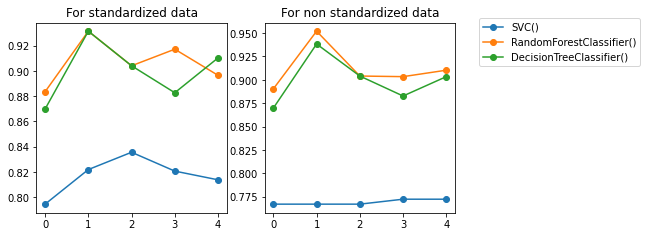

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]

for clf in [clf_svc,clf_rfc,clf_dtc]:
    scores=CVS(clf,std_X,y,cv=5)
    plt.subplot(1,2,1)
    plt.plot(scores,label=str(clf),marker='o')
    plt.title("For standardized data")
    


for clf in [clf_svc,clf_rfc,clf_dtc]:
    scores=CVS(clf,X,y,cv=5)
    plt.subplot(1,2,2)
    plt.plot(scores,label=str(clf),marker='o')
    plt.title("For non standardized data")
    
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

    



##Part4

In [ ]:
# function to compute mean of a 1D array
def mean_scratch(X):
    n=len(X)
    sm=0.0
    for x in X:
        sm+=x
    return sm/n

# function to compute covariance of two columns X and Y
def covariance_scratch(X,Y):
  mean_x=np.mean(X) #x_bar
  mean_y=np.mean(Y) #y_bar
  temp_X=X-mean_x #X-x_bar
  temp_Y=Y-mean_y #Y-y_bar
  temp=np.multiply(temp_X,temp_Y) #(X-x_bar).(Y-y_bar)
  return sum(temp)/(len(temp)-1) #sum((x_i=x_bar)*(y_i-y_bar))/(n-1)


#function to compute covariance matrix of a dataset df
def cov_matrix(df):
    
    cov_mat=np.zeros((len(df.columns),len(df.columns))) #initializing the covariance matrix with zeros
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            cov_mat[i][j]=covariance_scratch(df[df.columns[i]].to_numpy(),df[df.columns[j]].to_numpy()) #updating cov_mat[i][j] to the covariance of columns at ith and jth index in the dataset
    return cov_mat


#function to centralize a numpy array (df-mean(df))/std(df) Thus it makes mean of all columns zero and standard deviation one.
def centralize(Y):
    X=Y.copy()
    n=len(X)
    for i in range(X.shape[1]):
        x=X[:,i] # slicing out ith column
        x-=mean_scratch(x) # x-x_bar
        std=(covariance_scratch(x,x))**0.5 #computing standard deviation for the column x
        if(std==0):
            continue #if standard deviation is zero, it means that column contains a single value that is zero. In this case, there is no need to do divide it with std
        x=x/std #(x-x_bar)/std(x)
        X[:,i]=x #updating the ith column in the dataset to the centralized data 
    return X







In [ ]:
print("Covariance Matrix for centralized data")
scratch_std_X=pd.DataFrame(centralize(X_train),columns=df.columns[1:-1])
centralized_cov=cov_matrix(scratch_std_X)
show=pd.DataFrame(centralized_cov,columns=df.columns[1:-1])
show.set_index(df.columns[1:-1],inplace=True)

show


Covariance Matrix for centralized data


,steel,carbon,hardness,strength,shape,thick,width,len,bore
steel,1.000000,0.406552,-0.045960,0.515681,-0.217000,0.128265,0.011175,-0.136504,0.180919
carbon,0.406552,1.000000,-0.139656,-0.077924,-0.249042,0.216154,-0.022929,-0.133451,0.211388
hardness,-0.045960,-0.139656,1.000000,-0.132206,-0.106110,-0.000995,-0.020612,-0.087378,0.156807
strength,0.515681,-0.077924,-0.132206,1.000000,-0.135850,0.063555,0.061376,-0.086896,0.031827
shape,-0.217000,-0.249042,-0.106110,-0.135850,1.000000,-0.206704,0.152503,0.613037,-0.265710
thick,0.128265,0.216154,-0.000995,0.063555,-0.206704,1.000000,-0.004296,-0.097085,0.399941
width,0.011175,-0.022929,-0.020612,0.061376,0.152503,-0.004296,1.000000,0.093943,0.049871
len,-0.136504,-0.133451,-0.087378,-0.086896,0.613037,-0.097085,0.093943,1.000000,-0.162890
bore,0.180919,0.211388,0.156807,0.031827,-0.265710,0.399941,0.049871,-0.162890,1.000000


In [ ]:
print("Covariance Matrix for uncentralized data")
show_un=pd.DataFrame(cov_matrix(pd.DataFrame(X_train,columns=df.columns[1:-1])),columns=df.columns[1:-1])
show_un.set_index(df.columns[1:-1],inplace=True)
show_un

Covariance Matrix for uncentralized data


,steel,carbon,hardness,strength,shape,thick,width,len,bore
steel,2.057925,8.763518,-1.682732,83.354803,-0.155042,0.159164,6.297994,-3.668597e+02,34.259326
carbon,8.763518,225.785063,-53.558202,-131.933834,-1.863780,2.809530,-135.361278,-3.756716e+03,419.283244
hardness,-1.682732,-53.558202,651.382270,-380.192246,-1.348810,-0.021966,-206.676750,-4.177912e+03,528.279195
strength,83.354803,-131.933834,-380.192246,12696.071774,-7.623759,6.194489,2717.000873,-1.834321e+04,473.384814
shape,-0.155042,-1.863780,-1.348810,-7.623759,0.248056,-0.089053,29.840978,5.720058e+02,-17.468735
thick,0.159164,2.809530,-0.021966,6.194489,-0.089053,0.748251,-1.459999,-1.573315e+02,45.666540
width,6.297994,-135.361278,-206.676750,2717.000873,29.840978,-1.459999,154353.642582,6.914516e+04,2586.326773
len,-366.859690,-3756.715645,-4177.911881,-18343.213351,572.005787,-157.331513,69145.157352,3.509759e+06,-40282.097682
bore,34.259326,419.283244,528.279195,473.384814,-17.468735,45.666540,2586.326773,-4.028210e+04,17424.391730


In [ ]:
# function to compute the sorted eigen vectors of a covariance matrix of the dataset
def principalComponents(mat):
    eigvalues,eigvectors=np.linalg.eig(mat) #computing eigen values and corressponding eigen vectors for the covariance matrix
    idx=np.argsort(eigvalues)[::-1] # sorting the indices in decreasing order of eigenvalues
    return eigvalues[idx],eigvectors[idx] #returning sorted eigen values and eigen vectors

principalComponents(centralized_cov)

(array([2.30839453, 1.44217134, 1.22593187, 1.08539154, 0.89354239,
        0.84513822, 0.55636701, 0.36941938, 0.27364372]),
 array([[ 0.40846017,  0.48394975, -0.60624881, -0.21568812, -0.03696249,
          0.07050411, -0.39858182, -0.1281168 ,  0.05723212],
        [ 0.35833412,  0.11859328,  0.4875099 ,  0.06053812, -0.10704389,
         -0.26519352, -0.44452036,  0.20733036, -0.54206208],
        [ 0.33090847, -0.07169217, -0.06239791, -0.09369539, -0.58357028,
         -0.49258592,  0.45715246, -0.28357785,  0.00935722],
        [ 0.37152872, -0.17307529,  0.04173702, -0.0481057 ,  0.7375282 ,
         -0.46223399,  0.05722035, -0.13121162,  0.22328558],
        [-0.40030716,  0.29787593, -0.1157147 ,  0.6395615 ,  0.02193516,
         -0.40817683, -0.18144794, -0.35772774, -0.02476567],
        [-0.06462846,  0.2397406 , -0.05093358,  0.07449925, -0.12258877,
         -0.35191659,  0.02658251,  0.77156983,  0.44193135],
        [-0.4860404 ,  0.2681541 ,  0.21793885, -0.7131764

In [ ]:
#function to reduce the dataset by using principal component analysis (PCA)
#here n is the number of features in the reduced data
def pca(X,n):
    x=centralize(X) #centralizing the data
    cov_mat=cov_matrix(pd.DataFrame(x,columns=np.arange(x.shape[1]))) #computing covariance matrix of the centralized data
    _,pc=principalComponents(cov_mat) #getting array of sorted eigen vectors of the covariance matrix
    pc=pc[:n] #picking top n eigen vectors with higher eigen values
    X_reduced=np.dot(pc,x.T).T #reducing the data to n features by some simple matrix operations
    return X_reduced

pd.DataFrame(pca(X_train,2),columns=np.arange(2))


,0,1
0,-0.193281,-0.563655
1,0.509672,-0.125676
2,0.229026,-0.996583
3,0.108417,-0.097653
4,0.098535,-0.505754
...,...,...
468,0.460850,0.057964
469,-0.495366,-1.178790
470,1.034881,0.817796
471,2.796885,0.865371


## Part 5


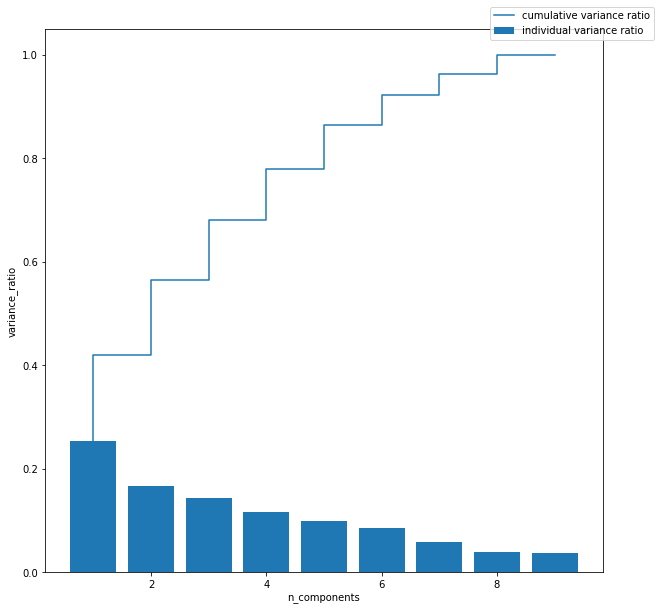

In [ ]:
eigenvalues,eigenvectors=principalComponents(centralized_cov)

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.bar(np.arange(len(eigenvalues))+1,explained_variance_ratio,label="individual variance ratio")
plt.step(np.arange(len(eigenvalues))+1,cumulative_explained_variance_ratio,label="cumulative variance ratio")
plt.xlabel('n_components')
plt.ylabel('variance_ratio')
plt.legend(bbox_to_anchor=(1.1, 1.05))

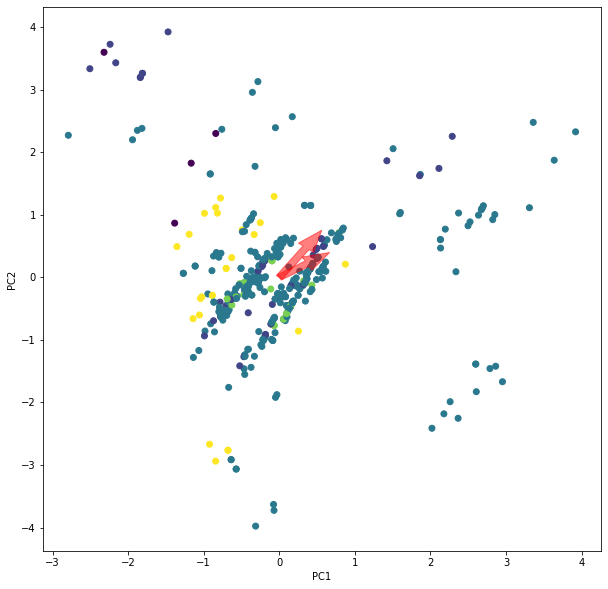

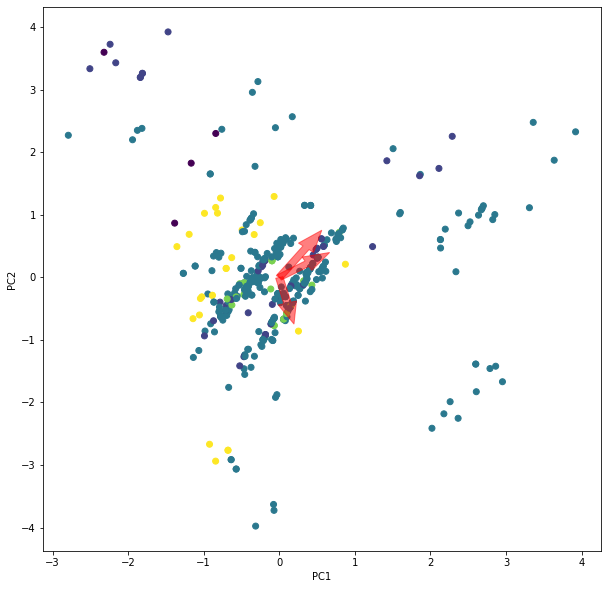

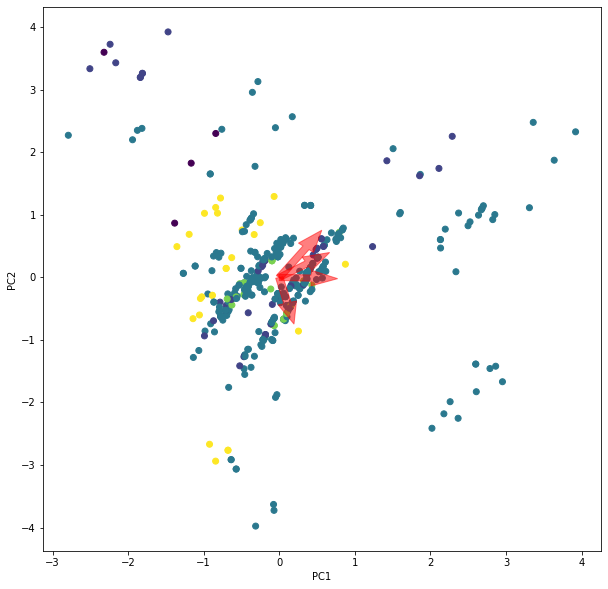

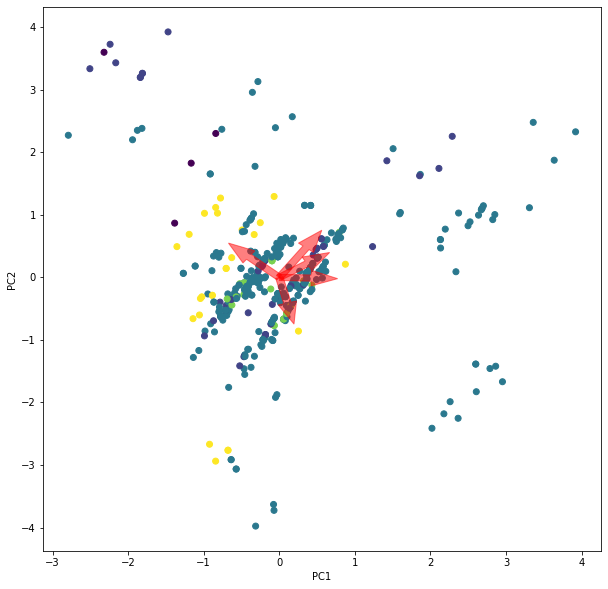

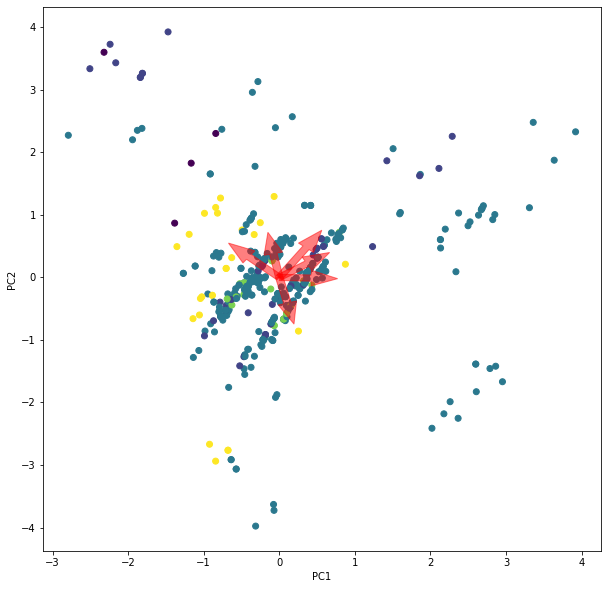

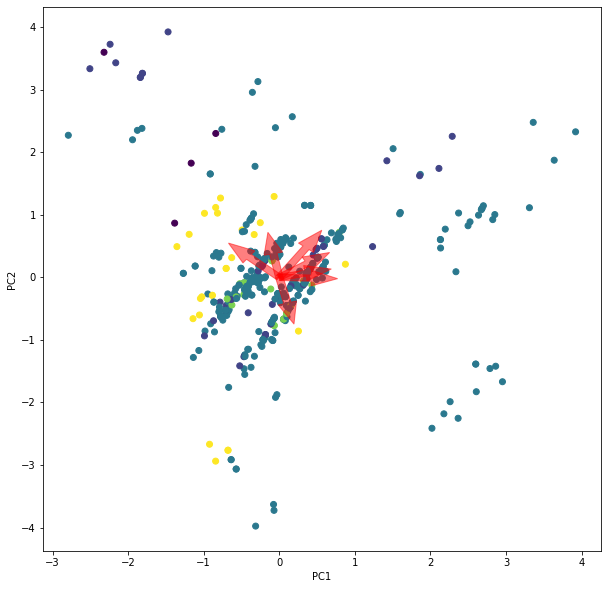

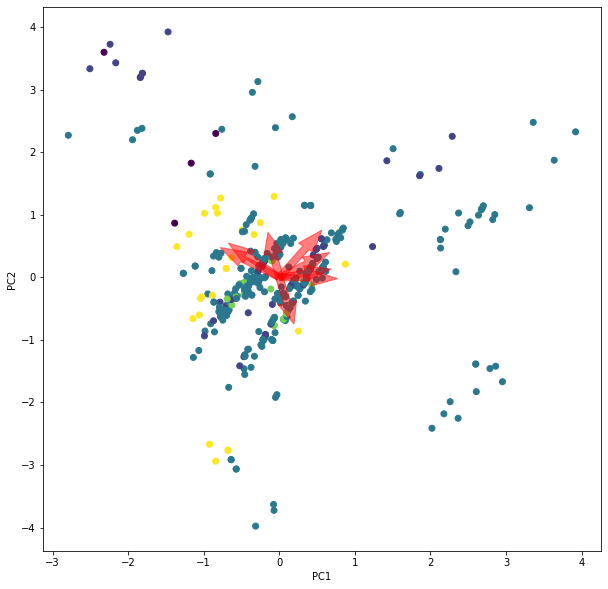

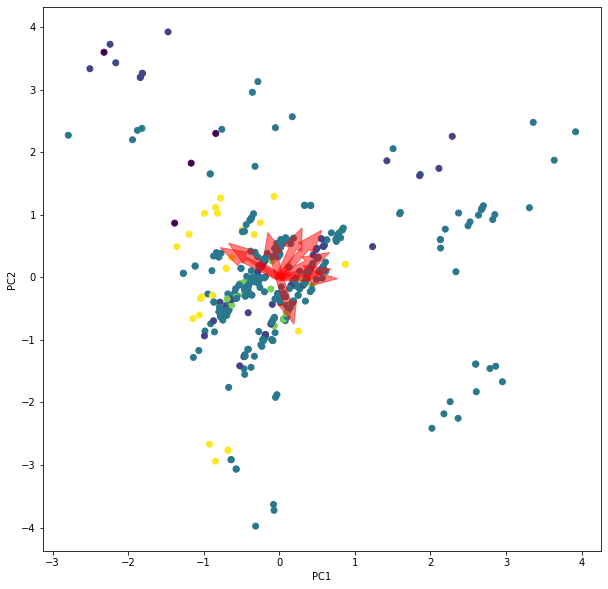

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
for n_components in range(2,10):
    X_pca=pca(X_train,n_components)
    W=eigenvectors[:n_components]
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
    # plt.legend(bbox_to_anchor=(1.1, 1.05))
    for i in range(n_components):
        plt.arrow(0, 0, W[i, 0], W[i, 1], alpha=0.5, width=0.1, head_width=0.25, head_length=0.35, color='r')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

##Part 6

In [ ]:
X_reduced=pca(X,2)
X_reduced_train,X_reduced_valid,y_reduced_train,y_reduced_valid=tts(X_reduced,y,test_size=0.3)
print(X_reduced_train.shape,X_reduced_valid.shape)

(509, 2) (219, 2)


In [ ]:
clf_svc=SVC()
clf_rfc=RandomForestClassifier()
clf_dtc=DecisionTreeClassifier()

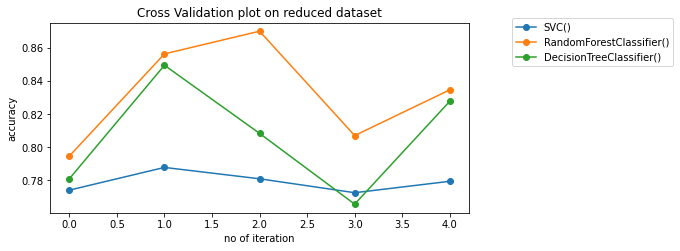

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]

for clf in [clf_svc,clf_rfc,clf_dtc]:
    scores=CVS(clf,X_reduced,y,cv=5)
    # plt.subplot(1,2,1)
    plt.plot(scores,label=str(clf),marker='o')
plt.title("Cross Validation plot on reduced dataset")
plt.xlabel('no of iteration')
plt.ylabel('accuracy')    



    
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()


##Part 7

In [ ]:
clf_svc=SVC().fit(X_train,y_train)
clf_rfc=RandomForestClassifier().fit(X_train,y_train)
clf_dtc=DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
clf_svc_reduced=SVC().fit(X_reduced_train,y_reduced_train)
clf_rfc_reduced=RandomForestClassifier().fit(X_reduced_train,y_reduced_train)
clf_dtc_reduced=DecisionTreeClassifier().fit(X_reduced_train,y_reduced_train)

In [ ]:
scores=[[],[]]
for clf in [clf_svc,clf_rfc,clf_dtc]:
    
    y_pred=clf.predict(X_valid)
    scores[0].append(accuracy_score(y_valid,y_pred))
for clf in [clf_svc_reduced,clf_rfc_reduced,clf_dtc_reduced]:
    
    y_pred=clf.predict(X_reduced_valid)
    scores[1].append(accuracy_score(y_reduced_valid,y_pred))
print("accuracy score")
show=pd.DataFrame(scores,columns=['SVM','Random Forest Classifier','Decision Tree Classifier'],index=['Unreduced','reduced'])
# rows=['Unreduced','reduced']
# show.set_index(rows,inplace=True)
# show.set_index(['Unreduced','reduced'],inplace=True)
show
    


accuracy score


,SVM,Random Forest Classifier,Decision Tree Classifier
Unreduced,0.784314,0.913725,0.882353
reduced,0.748858,0.803653,0.776256


In [ ]:
scores=[[],[]]
for clf in [clf_svc,clf_rfc,clf_dtc]:
    
    y_pred=clf.predict(X_valid)
    scores[0].append(f1_score(y_valid,y_pred,average='weighted'))
for clf in [clf_svc_reduced,clf_rfc_reduced,clf_dtc_reduced]:
    
    y_pred=clf.predict(X_reduced_valid)
    scores[1].append(f1_score(y_reduced_valid,y_pred,average='weighted'))
print("f1 score")
show=pd.DataFrame(scores,columns=['SVM','Random Forest Classifier','Decision Tree Classifier'],index=['Unreduced','reduced'])
# rows=['Unreduced','reduced']
# show.set_index(rows,inplace=True)
# show.set_index(['Unreduced','reduced'],inplace=True)
show

f1 score


,SVM,Random Forest Classifier,Decision Tree Classifier
Unreduced,0.689507,0.911742,0.885667
reduced,0.641320,0.790975,0.769621


##Part 8

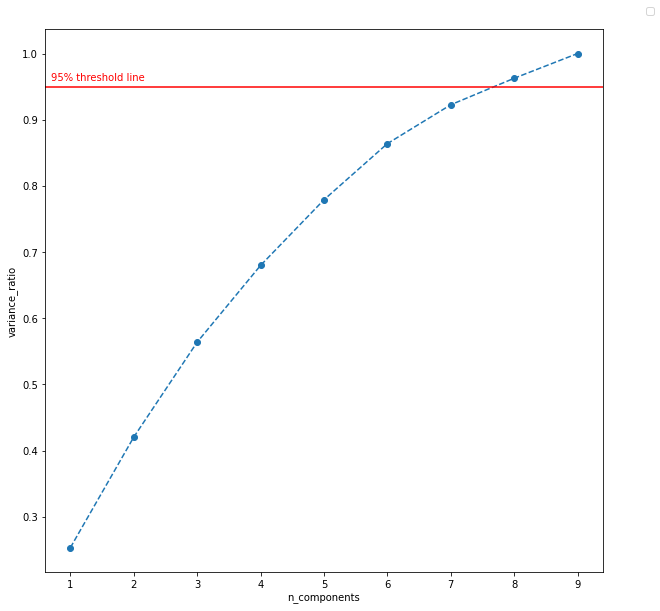

In [ ]:
from pyparsing import line
plt.rcParams["figure.figsize"] = [10, 10]
eigenvalues,eigenvectors=principalComponents(centralized_cov)

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# plt.bar(np.arange(len(eigenvalues))+1,explained_variance_ratio,label="individual variance ratio")
# plt.step(np.arange(len(eigenvalues))+1,cumulative_explained_variance_ratio,label="cumulative variance ratio")
plt.plot(np.arange(len(eigenvalues))+1,cumulative_explained_variance_ratio,marker='o',linestyle='--')
plt.axhline(y=0.95,color='r')
plt.text(0.7, 0.96,"95% threshold line",color='r')
plt.xlabel('n_components')
plt.ylabel('variance_ratio')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
X_reduced=pca(X,8)
pd.DataFrame(X_reduced,columns=np.arange(8)).corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.250398,0.252230,0.190077,-0.229550,0.234917,0.000673,0.088763
1,0.250398,1.000000,0.334697,0.192895,-0.228213,0.110693,0.008243,-0.011509
2,0.252230,0.334697,1.000000,0.172392,0.050752,0.313397,-0.102495,0.081712
3,0.190077,0.192895,0.172392,1.000000,0.267324,0.058911,0.031961,0.012156
4,-0.229550,-0.228213,0.050752,0.267324,1.000000,-0.044642,-0.188700,0.155540
5,0.234917,0.110693,0.313397,0.058911,-0.044642,1.000000,-0.248530,-0.140540
6,0.000673,0.008243,-0.102495,0.031961,-0.188700,-0.248530,1.000000,-0.294814
7,0.088763,-0.011509,0.081712,0.012156,0.155540,-0.140540,-0.294814,1.000000


#Problem 2

##Part 1

In [76]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
headers = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
df = pd.read_csv(url,names=headers)
df

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [78]:
X=df.drop('class',axis=1).to_numpy()
y=df['class'].to_numpy()
std_sc=StandardScaler()
std_sc.fit(X)
X=std_sc.transform(X)

pd.DataFrame(X,columns=df.columns[1:])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [111]:
class LDA:
    #constructor to set value for threshold variance
    def __init__(self,var_thres=0.95):
        self.var_thres=var_thres

    #function to compute scatter within class(Sw) and scatter between class (Sb)
    def __get_scatter(self,X,y):
        overall_mean=np.mean(X,axis=0) #calculating mean of whole dataset
        t_overall_mean=overall_mean.reshape(-1,1)

        #initializing the Sw and Sb matrices
        Sw=np.zeros((X.shape[1],X.shape[1]))
        Sb=np.zeros((X.shape[1],X.shape[1]))

        #computing class_mean for every class
        class_means=np.array([np.mean(X[y==label],axis=0) for label in self.classes])


        for idx,class_no in enumerate(self.classes):
            
            class_mean=class_means[idx] #getting the mean idx th class
            t_class_mean=class_mean.reshape(-1,1)
            sw=np.zeros((X.shape[1],X.shape[1])) #initializing scatter within idx th class with zeros
            for x in X[y==class_no]:
                x=x.reshape(-1,1)
                sw+=(x-t_class_mean).dot((x-t_class_mean).T) #sw=sum(x_i-x_bar).((x_i-x_bar).transpose)
            Sw+=sw # adding scatter within idx th class to Sw


            n_samples=X[y==class_no].shape[0] #calculating number of datapoints in idx th class
            Sb+=n_samples*(t_class_mean-t_overall_mean).dot((t_class_mean-t_overall_mean).T) #Sb=sum(class_mean-overall_mean).((class_mean-overall_mean).transpose)

        # print('Sw',Sw)
        # print('Sb',Sb)
        self.Sw=Sw
        self.Sb=Sb
        self.class_means=np.array(class_means)


    #function to compute linear discriminants
    def __get_eigen_vectors(self):
        

        final_mat=np.dot(np.linalg.inv(self.Sw),(self.Sb)) #computing inv(Sw).Sb
        eig_val,eig_vec=np.linalg.eig(final_mat) #computing eigen values and vectors of final matrix (inv(Sw).Sb)
        eig_vec=eig_vec.astype(float)
        eig_vec=eig_vec.T
        idx=np.argsort(abs(eig_val))[::-1] #sorting indices in decreasing order of eigen values
        sorted_eig_val=eig_val[idx] #sorting eigen values
        sorted_eig_vec=eig_vec[idx] # soring eigen vectors with decreaseing eigen values
        cum_var=np.cumsum(sorted_eig_val)/np.sum(sorted_eig_val) #calculating cumulative variance

        #computing n_components for which cumulative variance exceeds threshold variance
        n_components=0
        n_vec=len(eig_vec)
        while(n_components<n_vec-1 and cum_var[n_components]<self.var_thres):
            n_components+=1;
        

        self.proj_mat=sorted_eig_vec[:n_components+1] #getting linear discriminants/projection matrix by taking top n_component+1 eigen vectors
        self.n_components=n_components+1
        self.final_mat=final_mat
        self.eig_vec=sorted_eig_vec
        
        # print(eig_val)



    def fit(self,X,y):
        self.classes=np.unique(y) #computing classes in dataset
        self.__get_scatter(X,y) #computing Sw and Sb
        self.__get_eigen_vectors() #compputing linear discriminants
        


    def transform(self,X):
        proj_mat=self.proj_mat #getting projection matrix
        X_reduced=X.dot(proj_mat.T) #projecting the data on projection matrix and reducing it
        return X_reduced

    def predict(self,X,transformed=False):
        X_red=X
        if(transformed==False):
            X_red=self.transform(X) #transforming the test data and reducing its dimension to fit with that of training data

        class_means=self.transform(self.class_means) #transforming class means
        classes=self.classes
        preds=[]
        for x in X_red:
            dis=np.array([np.linalg.norm(x-class_mean) for class_mean in class_means]) #computing distance of sample from each class's mean
            preds.append(classes[np.argmin(dis)]) # making the class with least distance from the sample as predicted class
        return np.array(preds)



    def plot_feature_space(self,X,y):
        X_red=self.transform(X) #transforming the data

        #checking if data contains only one feature then plot datapoints on a line
        if(X_red.ndim==1 or X_red.shape[1]==1):
            plot_x=X_red
            plot_y=np.zeros(len(X_red))
        else:
            plot_x=X_red[:,0]
            plot_y=X_red[:,1]

        #scattering the points classwise with different colors
        for class_no in np.unique(y):
            idx=np.where(y==class_no)[0]
            plt.scatter(plot_x[idx],plot_y[idx],label=class_no)

        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.show()


    def predict_proba(self,X):
        X_red=self.transform(X) #transforming the data
        class_means=self.transform(self.class_means) #transforming class means
        probas=list()
        for x in X_red:
            dis=np.array([np.linalg.norm(x-class_mean) for class_mean in class_means]) #computing distance of sample from each class's mean
            dis=dis/np.sum(dis) #normalizing the distancing
            probas.append(dis) #appending the distance to the probas list
        return np.array(probas)

    
    
    def plot_decision_boundary(self,clf,X,Y):
        # print(n)
        # new_clf_RFC=  BaggingClassifier(base_estimator=SVC(),n_estimators=n ).fit(X_train,Y_train)
        # print(new_clf_RFC.score(X_test,Y_test))
        n_classes = len(self.classes)
        plot_colors = "ryb"
        plot_step = 0.04
        


        # X=self.transform(X)
            
            

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel("X1")
        plt.ylabel("X2")

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == self.classes[i])
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")


        plt.show()



                

In [80]:



lda=LDA(0.95)
lda.fit(X,y)
# pd.DataFrame(lda.transform(X),columns=np.arange(2))
# lda.predict(X)
accuracy_score(lda.predict(X),y)



<ipython-input-79-d7d8d24c6ecd>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


1.0

In [81]:

X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,shuffle=True)

lda.fit(X_train,y_train)
accuracy_score(lda.predict(X_test),y_test)

<ipython-input-79-d7d8d24c6ecd>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


1.0

##Part 2

<ipython-input-79-d7d8d24c6ecd>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


Text(0, 0.5, 'n_components')

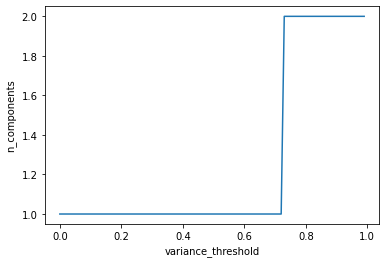

In [82]:
variances=np.arange(0,1,0.01)
n_components=[]
for var in variances:
    temp_lda=LDA(var)
    temp_lda.fit(X_train,y_train)
    n_components.append(temp_lda.n_components)

plt.plot(variances,n_components)
plt.xlabel('variance_threshold')
plt.ylabel('n_components')

<ipython-input-79-d7d8d24c6ecd>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


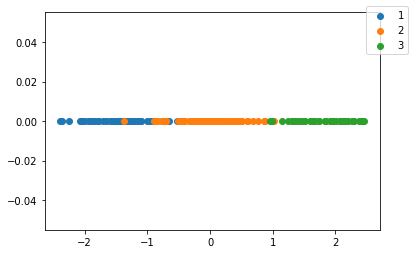

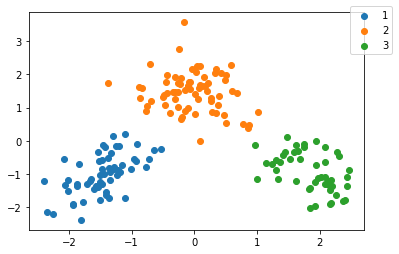

In [83]:
n_components=np.unique(n_components)
for var in [0.6,0.9]:
    temp_lda=LDA(var)
    temp_lda.fit(X,y)
    temp_lda.plot_feature_space(X,y)



##Part 3

In [84]:
def mean_scratch(X):
    n=len(X)
    sm=0.0
    for x in X:
        sm+=x
    return sm/n


def covariance_scratch(X,Y):
  mean_x=np.mean(X)
  mean_y=np.mean(Y)
  temp_X=X-mean_x
  temp_Y=Y-mean_y
  temp=np.multiply(temp_X,temp_Y)
  return sum(temp)/(len(temp)-1)

def cov_matrix(df):
    
    cov_mat=np.zeros((len(df.columns),len(df.columns)))
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            cov_mat[i][j]=covariance_scratch(df[df.columns[i]].to_numpy(),df[df.columns[j]].to_numpy())
    return cov_mat


def centralize(Y):
    X=Y.copy()
    n=len(X)
    for i in range(X.shape[1]):
        x=X[:,i]
        # print(x)
        x-=mean_scratch(x)
        # print(mean_scratch(x))
        std=(covariance_scratch(x,x))**0.5
        if(std==0):
            continue
        x=x/std
        # print(x==X[i])
        X[:,i]=x
    return X

def principalComponents(mat):
    eigvalues,eigvectors=np.linalg.eig(mat)
    idx=np.argsort(eigvalues)[::-1]
    return eigvalues[idx],eigvectors[idx]




def pca(X,n):
    x=centralize(X)
    cov_mat=cov_matrix(pd.DataFrame(x,columns=np.arange(x.shape[1])))
    _,pc=principalComponents(cov_mat)
    pc=pc[:n]

    X_reduced=np.dot(pc,x.T).T

    
    return X_reduced





In [131]:
X_reduced_pca=pca(X,2)
X_pca_train,X_pca_test,y_pca_train,y_pca_test=tts(X_reduced_pca,y,shuffle=True,test_size=0.3)

lda=LDA()
lda.fit(X,y)
X_reduced_lda=lda.transform(X)

X_lda_train,X_lda_test,y_lda_train,y_lda_test=tts(X_reduced_lda,y,shuffle=True,test_size=0.3)

<ipython-input-111-cb51224c520b>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


In [132]:
svm_clf=SVC()
DTC_clf=DecisionTreeClassifier()

scores=np.zeros((2,2))
svm_clf.fit(X_pca_train,y_pca_train)
DTC_clf.fit(X_pca_train,y_pca_train)
scores[0]=np.array([clf.score(X_pca_test,y_pca_test) for clf in [svm_clf,DTC_clf]])

svm_clf.fit(X_lda_train,y_lda_train)
DTC_clf.fit(X_lda_train,y_lda_train)
scores[1]=np.array([clf.score(X_lda_test,y_lda_test) for clf in [svm_clf,DTC_clf]])


pd.DataFrame(scores,columns=['SVM classifier','DTC classifier'],index=['pca','lda'])



,SVM classifier,DTC classifier
pca,0.666667,0.444444
lda,1.000000,1.000000


##Part 4

In [133]:
pd.DataFrame(scores,columns=['SVM classifier','DTC classifier'],index=['pca','lda'])


,SVM classifier,DTC classifier
pca,0.666667,0.444444
lda,1.000000,1.000000


Decision boundary for svm classifier


<ipython-input-111-cb51224c520b>:158: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


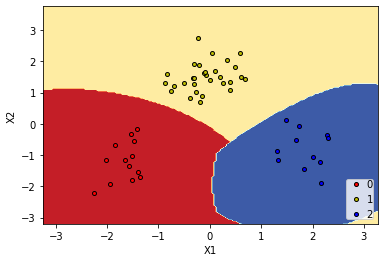

Decision boundary for Decision Tree classifier


<ipython-input-111-cb51224c520b>:158: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,


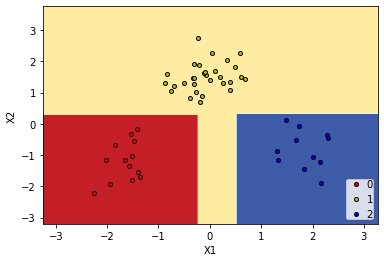

In [134]:

print('Decision boundary for svm classifier')
lda.plot_decision_boundary(svm_clf,X_lda_test,y_lda_test)

print('Decision boundary for Decision Tree classifier')
lda.plot_decision_boundary(DTC_clf,X_lda_test,y_lda_test)

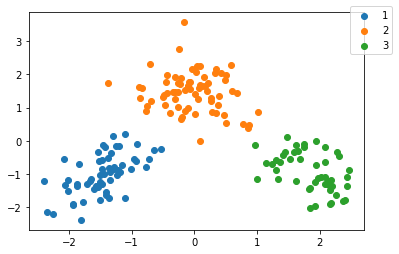

In [100]:
lda.plot_feature_space(X,y)

##Part 5

In [101]:
lda_clf=LDA()
lda_clf.fit(X_train,y_train)
lda_clf.predict_proba(X_test)

<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


array([[0.4468656 , 0.4986783 , 0.0544561 ],
       [0.4026087 , 0.14635138, 0.45103992],
       [0.47668883, 0.04624671, 0.47706446],
       [0.44585877, 0.43243787, 0.12170336],
       [0.43007477, 0.48273322, 0.08719201],
       [0.419778  , 0.13382327, 0.44639873],
       [0.38181795, 0.17452026, 0.44366179],
       [0.10478399, 0.47388423, 0.42133178],
       [0.12281713, 0.45803875, 0.41914412],
       [0.46276993, 0.02383639, 0.51339368],
       [0.11525251, 0.45879217, 0.42595531],
       [0.10426841, 0.42209735, 0.47363424],
       [0.43473677, 0.14557689, 0.41968633],
       [0.39861541, 0.45732577, 0.14405882],
       [0.42674976, 0.4360139 , 0.13723634],
       [0.44901832, 0.14368729, 0.40729439],
       [0.09165455, 0.46684913, 0.44149632],
       [0.42892696, 0.49801734, 0.0730557 ],
       [0.03084774, 0.47276488, 0.49638738],
       [0.16101018, 0.44074003, 0.39824979],
       [0.47128218, 0.40961819, 0.11909963],
       [0.45894863, 0.03168827, 0.5093631 ],
       [0.

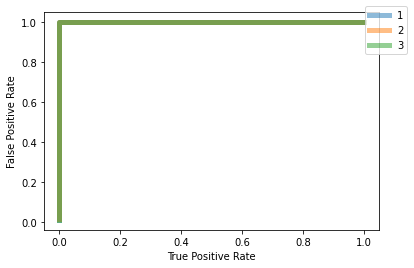

AUC:  [1.0, 1.0, 1.0]


In [104]:
def plot_roc_curve(clf,X,y):
    y_probas=clf.predict_proba(X)
    auc_s=[]
    for idx,class_no in enumerate(clf.classes):
        y_true=np.where(y==class_no,1,0)
        y_probs=y_probas[:,idx]
        thresholds=np.sort(y_probs)[::-1]
        tpr=[]
        fpr=[]
        for thres in thresholds:
            y_pred=np.where(y_probs>=thres,1,0)
            tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()
            tpr.append(tp/(tp+fn))
            fpr.append(fp/(fp+tn))
        auc=np.trapz(fpr,tpr)
        auc_s.append(auc)
        plt.plot(tpr,fpr,label=class_no,alpha=0.5,lw=5)
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()
    print("AUC: ",auc_s)

plot_roc_curve(lda_clf,X_train,y_train)
    

<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


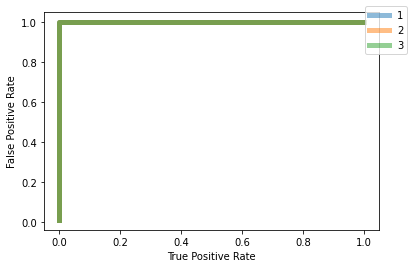

AUC:  [1.0, 1.0, 1.0]


<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


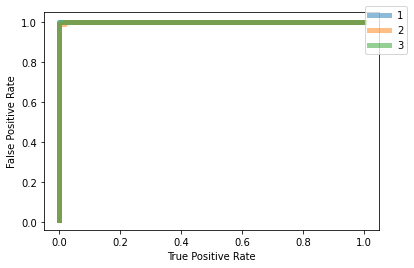

AUC:  [1.0, 0.9997919267582189, 1.0]


<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


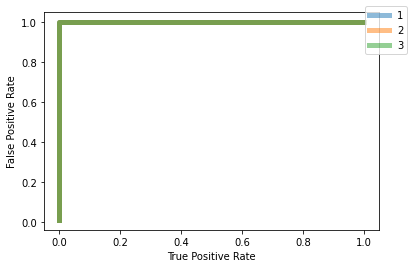

AUC:  [1.0, 0.9999999999999999, 1.0]


<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


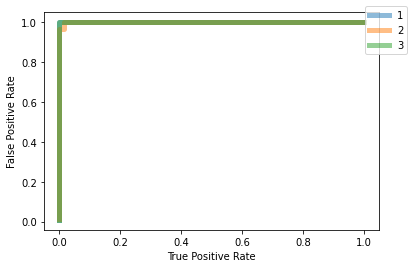

AUC:  [1.0, 0.9993975903614457, 1.0]


<ipython-input-98-d974f15cb440>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_vec=eig_vec.astype(float)


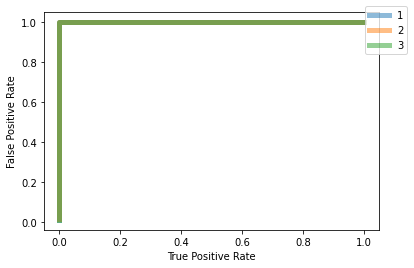

AUC:  [1.0, 1.0, 1.0]


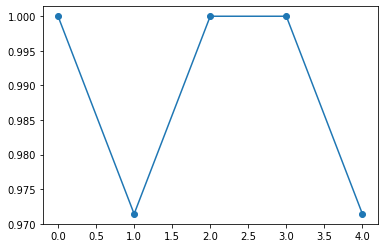

In [105]:
lda_clf=LDA()

def cross_validation(clf,k,X,y):
    indices = np.random.permutation(X.shape[0])
    fold_size = X.shape[0] // k
    validation_scores = np.zeros(k)
    for i in range(k):
        val_indices = indices[i*fold_size:(i+1)*fold_size]
        train_indices = np.concatenate((indices[:i*fold_size], indices[(i+1)*fold_size:]))
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]
        clf.fit(X_train, y_train)
        score = accuracy_score(clf.predict(X_val),y_val)
        validation_scores[i] = score
        plot_roc_curve(clf,X_train,y_train)
    return validation_scores


plt.plot(cross_validation(lda_clf,5,X,y),marker='o')




